# Examining the evolving trends and connection between road accidents and the average temperature in Germany.



The link between environmental conditions and road safety has consistently drawn attention. In this report, I explore how the average temperature in Germany from 2018 to 2020 correlates with the number of accidents on motorways inside and outside built-up areas. Uncovering this relationship can offer crucial information for creating measures to improve road safety and lessen the effects of harsh weather.

# Question

1. The changes of the temparature?
2. How the rate of road accident increasing day by day?
3. Is there any realtion between road accident and the temparature?

# Data Sources


1. Datasource: Federal Statistical Office of Germany
    * Metadata URL: https://www.destatis.de/
    * Data URL: https://www-genesis.destatis.de/genesis/online?language=en&sequenz=statistikTabellen&selectionname=46241#abreadcrumb
    * Data Type: CSV 
    * Description: The road accident data in Germany. This data also shows that the accident in Indoor and outdoor as well.
    * License Type: OpenData License 
        
        
2. Datasource: climate_environment/CDC/
    * Metadata URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/
    * Data URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_01.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_02.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_03.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_04.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_05.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_06.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_07.txt
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_08.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_09.txt
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_10.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_11.txt 
                https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_12.txt 
    
    * Data Type: txt 
    * License Type: OpenData License    
    * Description: This is monthly average air temparature in Germany. In this dataset it also shows that the temparature in state wise.


# Data Pipeline

The data pipeline involved several crucial steps to prepare the datasets for analysis. It addressed missing or incorrect entries in both the temperature and accident datasets by using imputation techniques and rigorous data validation. Temporal alignment of the data was crucial for accurately correlating temperature fluctuations with  accident frequency.

Technologies Used:
    Python,Pandas,SQLite,SQLAlchemy

Data Cleaning/Transformation Steps:    
     Missing temperature data were filled using interpolation methods. Outliers in the accident data were identified and removed to avoid distorted results. Additionally, the data was normalized to compensate for differences in reporting standards.

Problems Encountered:
    While working on the data engineering process, one of the main challenges was dealing with varying accident reporting standards across different regions. Additionally, ensuring consistent time resolution in both datasets was crucial for establishing a meaningful correlation. These challenges were addressed through meticulous data validation and cleaning procedures
    
    

In [81]:
# Import generally needed modules
import json, sys, calendar, sqlite3
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scipy
%pip install seaborn
%pip install 'SQLAlchemy==1.4.46'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [83]:
url_list = [
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_01.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_02.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_03.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_04.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_05.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_06.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_07.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_08.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_09.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_10.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_11.txt",
            "https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_12.txt",  
            ]

        # Initialize an empty list to store the DataFrames
dataframes = []

        # Loop through each URL and read data into a DataFrame
for url in url_list:
            # Use pd.read_csv to read data from the URL
            df_temp = pd.read_csv(url, sep=';', skiprows=1, skipfooter=0)
            dataframes.append(df_temp)


        # Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

#removed unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df = df.drop(columns=['Deutschland'])

#sorting data
df = df.sort_values(by=['Jahr', 'Monat'])

#rename header
df = df.rename(columns={"Jahr": "Year", "Monat": "Month"})
#keep data from 2018 to 2020
df = df.loc[(df['Year'] >= 2018) & (df['Year'] <= 2020)]
#change month value int to month name
df['Month'] = df['Month'].replace(
                            [num for num in range(1, 13)],
                            [month for month in calendar.month_name[1:]])
#creating new column Date with year and month
df.insert(loc=2, column="Date", value=df['Month'] + "-" + df['Year'].astype(str)) 
df = df.reset_index(drop=True)

df.head()

        

,Year,Month,Date,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen
0,2018,January,January-2018,3.31,3.31,4.33,3.14,4.10,2.87,3.90,3.90,4.79,4.75,3.23,5.09,3.30,3.68,3.47,3.20
1,2018,February,February-2018,-1.64,-1.66,-2.09,-2.96,-1.99,-1.47,-1.02,-1.02,-0.91,-1.40,-0.69,-0.90,-2.75,-1.67,-2.27,-3.05
2,2018,March,March-2018,1.40,1.39,3.19,2.24,2.83,0.76,2.62,2.61,3.80,3.55,1.56,3.81,1.32,1.96,1.79,1.58
3,2018,April,April-2018,12.92,12.90,12.50,12.52,12.63,10.81,12.02,12.01,12.74,12.69,10.04,12.71,12.79,12.84,12.61,12.30
4,2018,May,May-2018,17.18,17.16,15.23,15.66,15.87,15.76,16.63,16.64,16.30,15.78,15.59,15.97,15.99,16.77,16.14,15.31


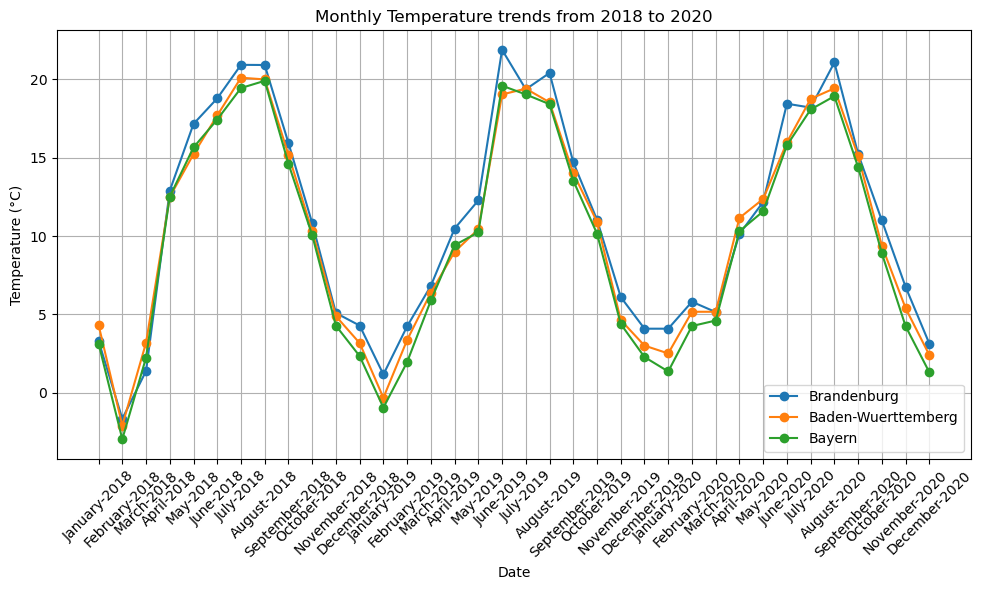

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Brandenburg'], marker='o', label='Brandenburg')
plt.plot(df['Date'], df['Baden-Wuerttemberg'], marker='o', label='Baden-Wuerttemberg')
plt.plot(df['Date'], df['Bayern'], marker='o', label='Bayern')

plt.title('Monthly Temperature trends from 2018 to 2020')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate the month names for better visibility
plt.legend()  # Show legend
plt.grid(True)  # Enable grid for easier readability
plt.tight_layout()  # Adjust layout to not cut off elements

plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 137 to 1717
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          36 non-null     int64  
 1   Month                         36 non-null     object 
 2   Date                          36 non-null     object 
 3   Brandenburg/Berlin            36 non-null     float64
 4   Brandenburg                   36 non-null     float64
 5   Baden-Wuerttemberg            36 non-null     float64
 6   Bayern                        36 non-null     float64
 7   Hessen                        36 non-null     float64
 8   Mecklenburg-Vorpommern        36 non-null     float64
 9   Niedersachsen                 36 non-null     float64
 10  Niedersachsen/Hamburg/Bremen  36 non-null     float64
 11  Nordrhein-Westfalen           36 non-null     float64
 12  Rheinland-Pfalz               36 non-null     float64
 13  Schleswi

In [84]:

url2 = "https://www-genesis.destatis.de/genesisWS/rest/2020/data/tablefile?username=DE9WS28QIO&password=Sohanhasan@123&name=46241-0021&area=all&compress=false&transpose=true&startyear=2018&endyear=2020&language=en"
df2 = pd.read_csv(url2, sep=';', skiprows=6, skipfooter=3, engine='python')

# Deleting rows 0 and 2
df2 = df2.drop([0, 2])

df2 = df2.reset_index(drop=True)

# Always keep the first two columns
always_keep = df2.iloc[:, :2]

# From the 3rd column onward, apply the condition
# Check for columns where both the first and second rows are 'Total'
condition_columns = df2.iloc[:, 2:]
mask = (condition_columns.iloc[0] == 'Total') & (condition_columns.iloc[1] == 'Total')

# Filter the DataFrame to keep only those columns
filtered_columns = condition_columns.loc[:, mask]

# Concatenate the always kept columns with the conditionally kept columns
final_df = pd.concat([always_keep, filtered_columns], axis=1)

# Deleting rows 0 and 2
final_df = final_df.drop([0, 1])
final_df = final_df.reset_index(drop=True)

final_df.columns = [col.split('.')[0] for col in final_df.columns]

final_df = final_df.rename(columns={
    'Unnamed: 0': 'Year',  # New name for 'Unnamed: 0'
    'Unnamed: 1': 'Month'   # New name for 'Unnamed: 1'
})

final_df['Year'] = final_df['Year'].astype(int)


final_df.head()


,Year,Month,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2018,January,25125,31852,11254,6483,1865,5243,11627,4412,17092,53635,11714,2952,8447,5551,6879,4558
1,2018,February,23267,28969,10427,5428,1796,5013,10766,3638,14940,50510,10621,2511,6961,4855,6675,4023
2,2018,March,26471,32690,11640,6800,1953,5527,11363,4499,16214,54837,11529,2892,8950,6363,7106,4644
3,2018,April,28399,35224,12856,7273,2108,5831,12563,4623,17879,56248,12271,2994,9412,6347,7019,4792
4,2018,May,27337,35379,13075,7784,2223,5901,12723,5424,19160,55686,12540,2928,9582,6510,8575,5194


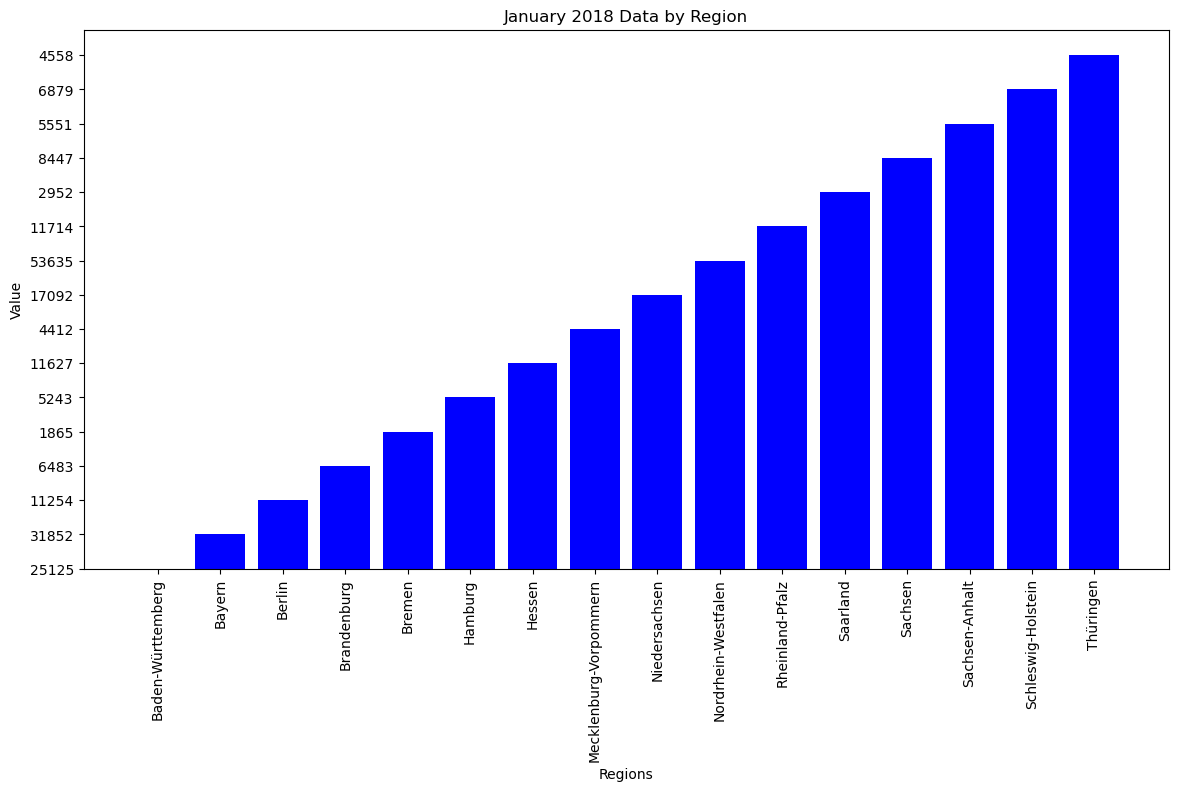

In [78]:
# Filter the data for January 2018
january_data = final_df[final_df['Month'] == 'January'].iloc[0, 2:]  # Skip Year and Month columns

# Create the bar chart
plt.figure(figsize=(14, 7))  # Set the figure size
plt.bar(january_data.index, january_data.values, color='blue')
plt.xlabel('Regions')
plt.ylabel('Value')
plt.title('January 2018 Data by Region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    36 non-null     int64 
 1   Month                   36 non-null     object
 2   Baden-Württemberg       36 non-null     object
 3   Bayern                  36 non-null     object
 4   Berlin                  36 non-null     object
 5   Brandenburg             36 non-null     object
 6   Bremen                  36 non-null     object
 7   Hamburg                 36 non-null     object
 8   Hessen                  36 non-null     object
 9   Mecklenburg-Vorpommern  36 non-null     object
 10  Niedersachsen           36 non-null     object
 11  Nordrhein-Westfalen     36 non-null     object
 12  Rheinland-Pfalz         36 non-null     object
 13  Saarland                36 non-null     object
 14  Sachsen                 36 non-null     object
 15  Sachsen-

# Result and Limitations

The plot clearly shows a typical temperature progression with increases from January to July, followed by a decrease towards September. This indicates normal seasonal variations.There are notable differences in temperature trends between the regions. Baden-Wuerttemberg and Bayern generally experienced higher peaks and lower troughs than Brandenburg, indicating a slightly wider range of temperatures.

The data collected across various regions in Germany for the year 2018 displays distinct seasonal temperature variations, highlighting differences in climatic conditions across regions.The data demonstrates a typical progression of temperatures increasing from January through July, followed by a subsequent decrease towards September. 


Resolution: Monthly averages are used, which can mask daily or weekly variations that might be critical for more detailed climate analysis or impact assessments.
Region Specificity: The data aggregates temperatures by large regions, which may not accurately reflect local microclimates. For instance, urban areas might have higher temperatures due to the heat island effect


